Accuracy (Linear Kernel): 80.00%
Confusion Matrix (Linear Kernel):
 [[14  3]
 [ 3 10]]
Accuracy (Polynomial Kernel): 80.00%
Confusion Matrix (Polynomial Kernel):
 [[14  3]
 [ 3 10]]
Accuracy (RBF Kernel): 76.67%
Confusion Matrix (RBF Kernel):
 [[14  3]
 [ 4  9]]


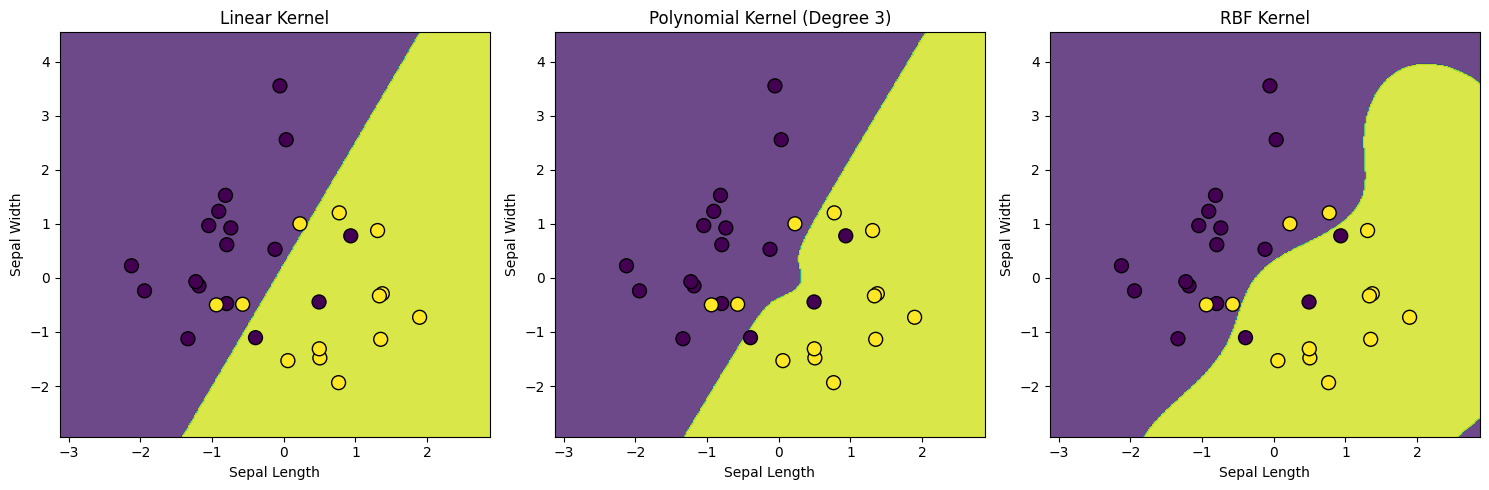

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()

# For simplicity, we will use only the first two classes (Setosa and Versicolor)
X = iris.data[iris.target != 2][:, :2]  # Select only two features for visualization
y = iris.target[iris.target != 2]       # Labels for Setosa and Versicolor

# Add noise to make the dataset more challenging
np.random.seed(42)
noise = np.random.normal(0, 0.5, X.shape)  # Gaussian noise
X += noise

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for SVM performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM with linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = svm_linear.predict(X_test)

# Evaluate the model
accuracy_linear = accuracy_score(y_test, y_pred_linear)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)

print(f"Accuracy (Linear Kernel): {accuracy_linear * 100:.2f}%")
print("Confusion Matrix (Linear Kernel):\n", conf_matrix_linear)

# Train SVM with polynomial kernel (degree 3)
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(X_train, y_train)

# Predict on the test set
y_pred_poly = svm_poly.predict(X_test)

# Evaluate the model
accuracy_poly = accuracy_score(y_test, y_pred_poly)
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly)

print(f"Accuracy (Polynomial Kernel): {accuracy_poly * 100:.2f}%")
print("Confusion Matrix (Polynomial Kernel):\n", conf_matrix_poly)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Predict on the test set
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate the model
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)

print(f"Accuracy (RBF Kernel): {accuracy_rbf * 100:.2f}%")
print("Confusion Matrix (RBF Kernel):\n", conf_matrix_rbf)

# Function to plot decision boundaries
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100)
    plt.title(title)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')

# Plot decision boundaries for each kernel
plt.figure(figsize=(15, 5))

# Linear Kernel
plt.subplot(1, 3, 1)
plot_decision_boundary(X_test, y_test, svm_linear, "Linear Kernel")

# Polynomial Kernel
plt.subplot(1, 3, 2)
plot_decision_boundary(X_test, y_test, svm_poly, "Polynomial Kernel (Degree 3)")

# RBF Kernel
plt.subplot(1, 3, 3)
plot_decision_boundary(X_test, y_test, svm_rbf, "RBF Kernel")

plt.tight_layout()
plt.show()
